In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import shap

/home/vscode/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bodmas_dataset_path = '../datasets/bodmas.npz'
bodmas_dataset = np.load(bodmas_dataset_path)

In [3]:
X = bodmas_dataset['X']
y = bodmas_dataset['y']
X.shape, y.shape

((134435, 2381), (134435,))

In [4]:
X_df = pd.DataFrame(X)
X_df

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0


In [5]:
def build_feature_names():
    num_of_features = 2351
    names = [''] * num_of_features
    base = 0
    
    for i in range(256):
        names[base + i] = 'ByteHistogram' + str(i)
    base = 256
    for i in range(256):
        names[base + i] = 'ByteEntropyHistogram' + str(i)
    base += 256
    names[base + 0] = 'numstrings'
    names[base + 1] = 'avlength'
    
    for i in range(96):
        names[base + 2 + i] = 'printabledist' + str(i)
    names[base + 98] = 'printables'
    names[base + 99] = 'string_entropy'
    names[base + 100] = 'paths_count'
    names[base + 101] = 'urls_count'
    names[base + 102] = 'registry_count'
    names[base + 103] = 'MZ_count'
    base += 104
    names[base + 0] = 'size'
    names[base + 1] = 'vsize'
    names[base + 2] = 'has_debug'
    names[base + 3] = 'exports'
    names[base + 4] = 'imports'
    names[base + 5] = 'has_relocations'
    names[base + 6] = 'has_resources'
    names[base + 7] = 'has_signature'
    names[base + 8] = 'has_tls'
    names[base + 9] = 'symbols'
    base += 10
    names[base + 0] = 'timestamp'
    for i in range(10):
        names[base + 1 + i] = 'machine_hash' + str(i)
    for i in range(10):
        names[base + 11 + i] = 'characteristics_hash' + str(i)
    for i in range(10):
        names[base + 21 + i] = 'subsystem_hash' + str(i)
    for i in range(10):
        names[base + 31 + i] = 'dll_characteristics_hash' + str(i)
    for i in range(10):
        names[base + 41 + i] = 'magic_hash' + str(i)
    names[base + 51] = 'major_image_version'
    names[base + 52] = 'minor_image_version'
    names[base + 53] = 'major_linker_version'
    names[base + 54] = 'minor_linker_version'
    names[base + 55] = 'major_operating_system_version'
    names[base + 56] = 'minor_operating_system_version'
    names[base + 57] = 'major_subsystem_version'
    names[base + 58] = 'minor_subsystem_version'
    names[base + 59] = 'sizeof_code'
    names[base + 60] = 'sizeof_headers'
    names[base + 61] = 'sizeof_heap_commit'
    base += 62
    # SectionInfo
    names[base + 0] = 'num_sections'
    names[base + 1] = 'num_zero_size_sections'
    names[base + 2] = 'num_unnamed_sections'
    names[base + 3] = 'num_read_and_execute_sections'
    names[base + 4] = 'num_write_sections'
    for i in range(50):
        names[base + 5 + i] = 'section_size_hash' + str(i)
    for i in range(50):
        names[base + 55 + i] = 'section_entropy_hash' + str(i)
    for i in range(50):
        names[base + 105 + i] = 'section_vsize_hash' + str(i)
    for i in range(50):
        names[base + 155 + i] = 'section_entry_name_hash' + str(i)
    for i in range(50):
        names[base + 205 + i] = 'section_characteristics_hash' + str(i)
    base += 255
    # ImportsInfo
    for i in range(256):
        names[base + 0 + i] = 'import_libs_hash' + str(i)
    for i in range(1024):
        names[base + 256 + i] = 'import_funcs_hash' + str(i)
    base += 1280
    # ExportsInfo
    for i in range(128):
        names[base + 0 + i] = 'export_libs_hash' + str(i)
    base += 128
    
    assert base == num_of_features
    
    return(names)

def get_non_hashed_features():
    feature_names = build_feature_names()
    result = []
    for i, feature_name in enumerate(feature_names):
        if '_hash' not in feature_name and 'Histogram' not in feature_name and 'printabledist' not in feature_name:
            result.append(i)
    return result

def get_hashed_features():
    feature_names = build_feature_names()
    result = []
    for i, feature_name in enumerate(feature_names):
        if '_hash' in feature_name or 'Histogram' in feature_name or 'printabledist' in feature_name:
            result.append(i)
    return result 

In [6]:
def load_features():
    feature_names = np.array(build_feature_names())
    non_hashed = get_non_hashed_features()
    hashed = get_hashed_features()
    
    feature_ids = list(range(feature_names.shape[0]))
    features = {
        'all': feature_ids,
        'non_hashed': non_hashed,
        'hashed': hashed
    }
    
    name_feat = dict(zip(feature_names, feature_ids))
    feat_name = dict(zip(feature_ids, feature_names))

    return features, feature_names, name_feat, feat_name

In [7]:
lf, fn, nf, ft = load_features()
fn

array(['ByteHistogram0', 'ByteHistogram1', 'ByteHistogram2', ...,
       'export_libs_hash125', 'export_libs_hash126',
       'export_libs_hash127'], shape=(2351,), dtype='<U30')

In [8]:
metadata_new = pd.read_csv('../datasets/bodmas_metadata_new.csv', parse_dates=['timestamp'])
metadata_new.fillna('benign', inplace=True)
metadata_new['timestamp_new'] = pd.to_datetime(metadata_new['timestamp_new'], utc=True).astype(np.int64)
bodmas_category = pd.read_csv('../datasets/bodmas_malware_category.csv')
bodmas_category.rename(columns={'sha256': 'sha'}, inplace=True)
bodmas_data = pd.merge(metadata_new, bodmas_category, on='sha', how='left')
bodmas_data.drop(columns=['timestamp'], inplace=True)
bodmas_data.fillna({'category': 'benign'}, inplace=True)

In [9]:
le = LabelEncoder()
bodmas_data['category'] = le.fit_transform(bodmas_data['category'])
bodmas_data['family'] = le.fit_transform(bodmas_data['family'])
bodmas_data.drop('sha', axis=1, inplace=True)
bodmas_data.head()

,family,timestamp_new,category
0,54,1167641199000000000,1
1,54,1169831790000000000,1
2,54,1174442933000000000,1
3,54,1177505706000000000,1
4,54,1195052635000000000,1


In [10]:
X_full = pd.concat([X_df, bodmas_data[['timestamp_new', 'family']], pd.DataFrame(y)], axis=1, ignore_index=True, sort=False)
X_full

,0,1,2,3,4,5,6,7,8,9,...,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1167641199000000000,54,0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,120.0,16564.0,0.0,0.0,0.0,0.0,1169831790000000000,54,0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1174442933000000000,54,0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,140.0,16384.0,0.0,0.0,0.0,0.0,1177505706000000000,54,0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1195052635000000000,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435122000000000,33,1
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435123000000000,33,1
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435124000000000,33,1
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435126000000000,33,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((107548, 2381), (26887, 2381), (107548,), (26887,))

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
def summary(y_test, pred):
    acc = accuracy_score(y_test, pred, normalize=True)
    prec = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    
    print('Length of Testing Data: ', len(y_test))
    print('Accuracy: ', acc)
    print('Precision: ', prec)
    print('Recall Score: ', recall)

In [14]:
DecTree = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=42)
DecTree.fit(X_train, y_train)
pred = DecTree.predict(X_test)
summary(y_test, pred)

Length of Testing Data:  26887
Accuracy:  0.8202477033510619
Precision:  0.8198229070434625
Recall Score:  0.8202477033510619


In [15]:
print(DecTree.score(X_train, y_train))
print(DecTree.score(X_test, y_test))

0.823316100717819
0.8202477033510619


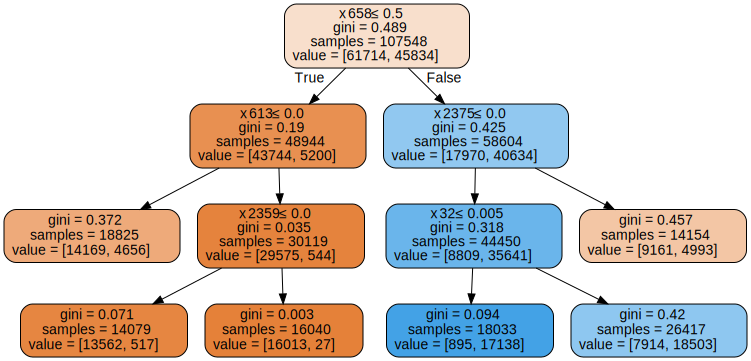

In [16]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    DecTree,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph

In [17]:
X_test.shape

(26887, 2381)

In [ ]:
explainerx = shap.TreeExplainer(DecTree, X_train)
shap_valuesx = explainerx(X_test)

 99%|===================| 53402/53774 [00:14<00:00]        

In [24]:
s_v = shap_valuesx.values

In [25]:
pd.DataFrame(s_v[:,:,0])

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.037193,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.117916,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.117916,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.075148,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.075148,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.163323,0.0,0.0,0.0,0.0,0.0
26883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.117916,0.0,0.0,0.0,0.0,0.0
26884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.117916,0.0,0.0,0.0,0.0,0.0
26885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.176586,0.0,0.0,0.0,0.0,0.0


In [32]:
zero = pd.DataFrame(s_v[:,:,0]).sum(axis=0)
zero[zero != 0].index, zero[zero != 0].values

(Index([32, 613, 658, 2359, 2375], dtype='int64'),
 array([ 324.41785873,  116.41367116,  332.58044101,   67.29385291,
        -555.32992013]))

In [26]:
pd.DataFrame(s_v[:,:,1])

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.037193,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.117916,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.117916,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.075148,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.075148,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.163323,0.0,0.0,0.0,0.0,0.0
26883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.117916,0.0,0.0,0.0,0.0,0.0
26884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.117916,0.0,0.0,0.0,0.0,0.0
26885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.176586,0.0,0.0,0.0,0.0,0.0


In [22]:
pd.DataFrame(shap_valuesx[:,:].data)

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.005620,0.004043,0.021421,0.011588,0.011666,0.017601,0.012580,0.014623,0.036289,0.032677,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
1,0.073049,0.004523,0.041716,0.007480,0.046102,0.009307,0.043679,0.012513,0.128336,0.022966,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
2,0.376281,0.016807,0.038647,0.027104,0.039195,0.290622,0.035546,0.011142,0.029265,0.031080,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
3,0.007664,0.004094,0.022166,0.011563,0.011563,0.017848,0.012401,0.014879,0.035392,0.032495,...,0.000000e+00,0.000000,0.0,0.0,1.241979e-07,0.000030,0.0,0.0,0.0,0.0
4,0.130464,0.009731,0.036604,0.015789,0.016908,0.024589,0.015068,0.013277,0.064232,0.026416,...,8.032236e-08,0.000837,0.0,0.0,1.335361e-06,0.000796,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26882,0.538078,0.001230,0.002299,0.001219,0.005801,0.003594,0.005014,0.002980,0.007390,0.009780,...,0.000000e+00,0.000000,0.0,0.0,6.536732e-08,0.000001,0.0,0.0,0.0,0.0
26883,0.114602,0.005545,0.020062,0.011271,0.013636,0.016922,0.010735,0.012948,0.036505,0.026049,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
26884,0.005969,0.003911,0.020644,0.011180,0.011348,0.017268,0.012376,0.014314,0.035186,0.032258,...,0.000000e+00,0.000000,0.0,0.0,2.801456e-08,0.000005,0.0,0.0,0.0,0.0
26885,0.003933,0.003967,0.021129,0.011322,0.011580,0.017579,0.012522,0.014567,0.035706,0.032366,...,0.000000e+00,0.000000,0.0,0.0,1.195288e-07,0.000032,0.0,0.0,0.0,0.0


In [21]:
pd.DataFrame(shap_valuesx[:,:,1].data)

,0,1,2,3,4,5,6,7,8,9,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,0.005620,0.004043,0.021421,0.011588,0.011666,0.017601,0.012580,0.014623,0.036289,0.032677,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
1,0.073049,0.004523,0.041716,0.007480,0.046102,0.009307,0.043679,0.012513,0.128336,0.022966,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
2,0.376281,0.016807,0.038647,0.027104,0.039195,0.290622,0.035546,0.011142,0.029265,0.031080,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
3,0.007664,0.004094,0.022166,0.011563,0.011563,0.017848,0.012401,0.014879,0.035392,0.032495,...,0.000000e+00,0.000000,0.0,0.0,1.241979e-07,0.000030,0.0,0.0,0.0,0.0
4,0.130464,0.009731,0.036604,0.015789,0.016908,0.024589,0.015068,0.013277,0.064232,0.026416,...,8.032236e-08,0.000837,0.0,0.0,1.335361e-06,0.000796,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26882,0.538078,0.001230,0.002299,0.001219,0.005801,0.003594,0.005014,0.002980,0.007390,0.009780,...,0.000000e+00,0.000000,0.0,0.0,6.536732e-08,0.000001,0.0,0.0,0.0,0.0
26883,0.114602,0.005545,0.020062,0.011271,0.013636,0.016922,0.010735,0.012948,0.036505,0.026049,...,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0
26884,0.005969,0.003911,0.020644,0.011180,0.011348,0.017268,0.012376,0.014314,0.035186,0.032258,...,0.000000e+00,0.000000,0.0,0.0,2.801456e-08,0.000005,0.0,0.0,0.0,0.0
26885,0.003933,0.003967,0.021129,0.011322,0.011580,0.017579,0.012522,0.014567,0.035706,0.032366,...,0.000000e+00,0.000000,0.0,0.0,1.195288e-07,0.000032,0.0,0.0,0.0,0.0


In [ ]:
explainer = shap.TreeExplainer(DecTree)
shap_values = explainer.shap_values(X_test)

In [25]:
type(shap_values)
# Output: list
# len(shap_values)
# Output: 2 (for binary classification)

numpy.ndarray

In [26]:
print(shap_values.shape)
print(X_test.shape)

(26887, 2381, 2)
(26887, 2381)


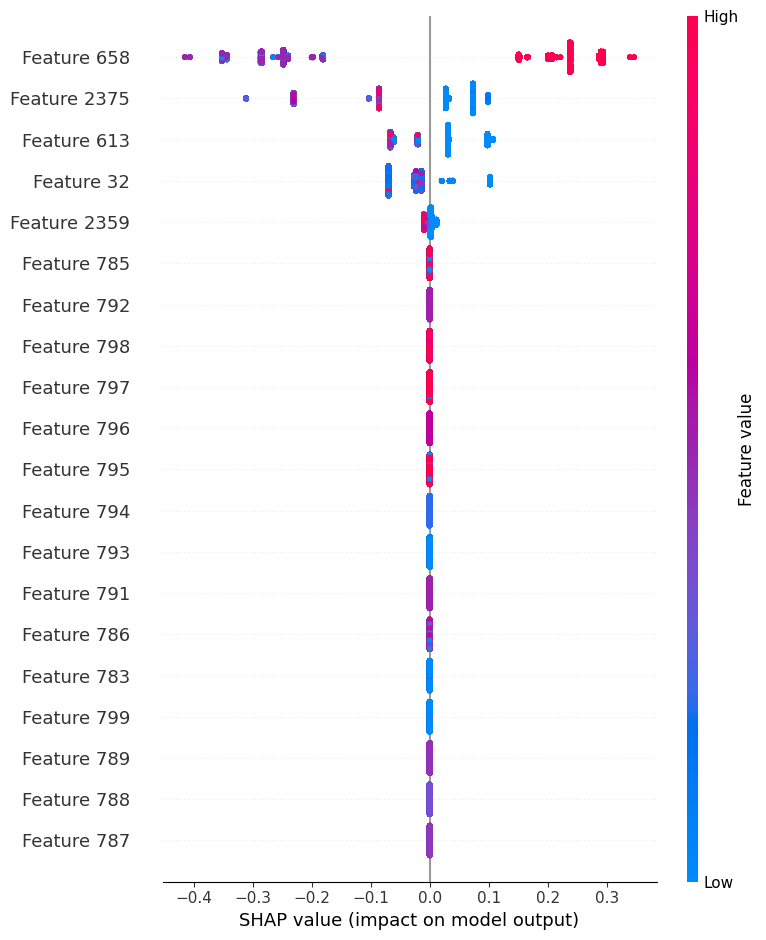

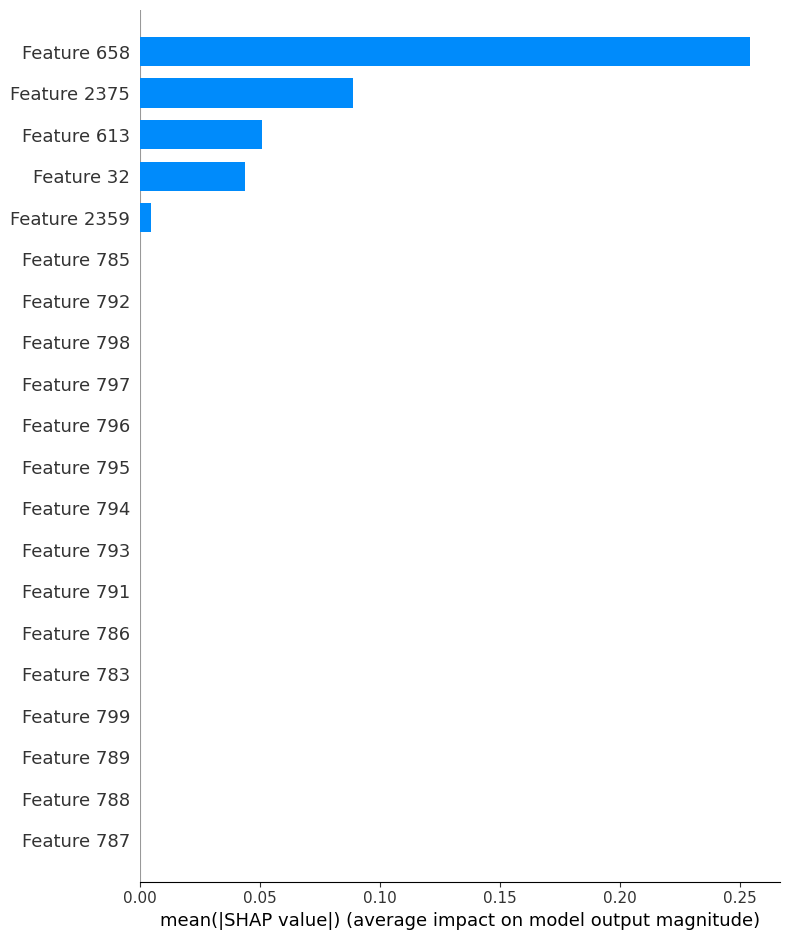

In [31]:
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="dot")  # Class 1
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")

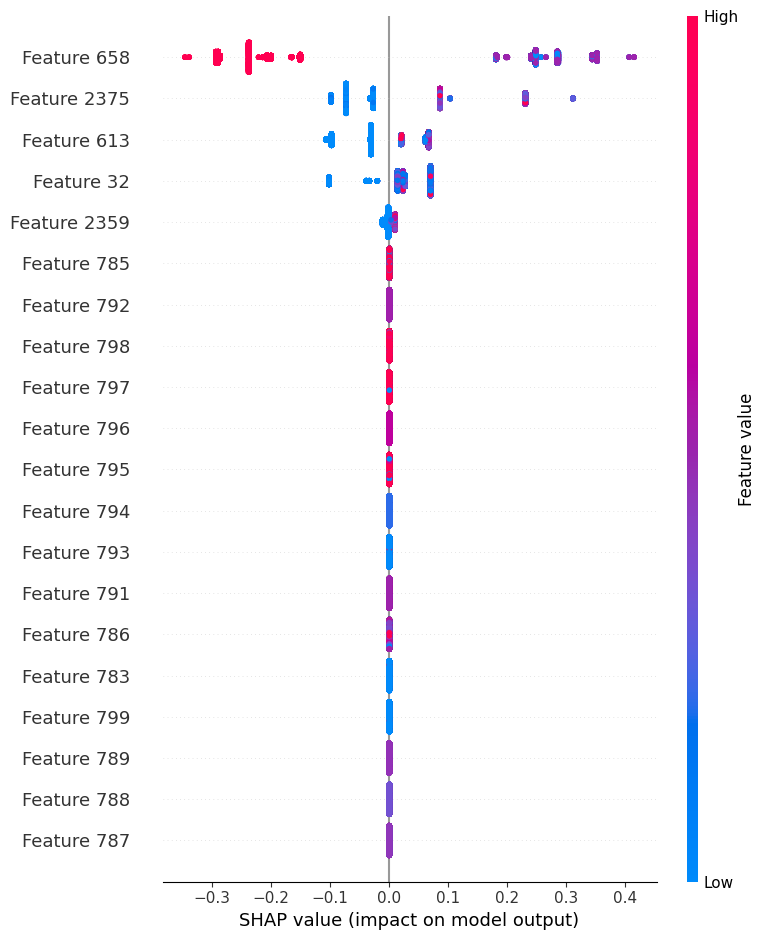

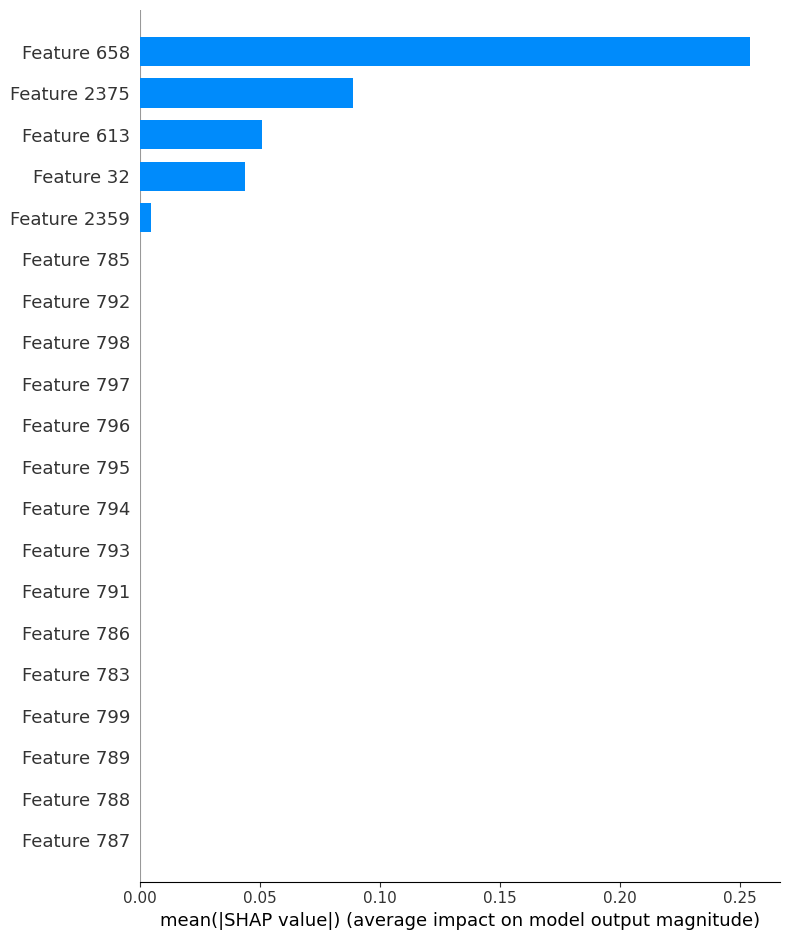

In [28]:
shap.summary_plot(shap_values[:, :, 0], X_test, plot_type="dot")  # Class 1
shap.summary_plot(shap_values[:, :, 0], X_test, plot_type="bar")

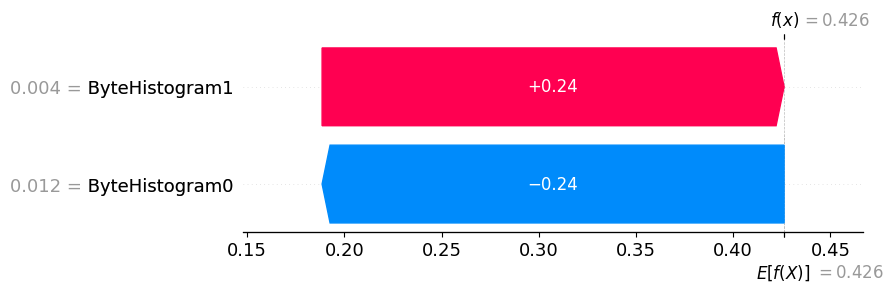

In [42]:
i = 658

# Build the SHAP Explanation object (for binary classification, use shap_values[1])
explanation = shap.Explanation(
    values=shap_values[1][i],
    base_values=explainer.expected_value[1],
    data=X_test[i],
    feature_names=fn  # your list of 2381 feature names
)

# Plot waterfall showing top features for that sample
shap.plots.waterfall(explanation, max_display=15)